In [ ]:
!python --version

Python 3.8.15


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from time import time
import sqlite3
from tqdm import tqdm
from textblob import TextBlob
from sklearn import tree
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from scipy.sparse import hstack
from scipy.stats import describe
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.inspection import permutation_importance

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import NuSVC
from xgboost import XGBClassifier
import xgboost as xgb

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def calculate_metrics(true_y, pred_y):
  print('Accuracy: %.3f' % accuracy_score(true_y, pred_y))
  print('Precision: %.3f' % precision_score(true_y, pred_y))
    
  print('Recall: %.3f' % recall_score(true_y, pred_y))
    
  print('F1 Score: %.3f' % f1_score(true_y, pred_y))


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words("english"))

In [3]:
# loading the data files
#Train data
train_df = pd.read_csv("new_data_train.csv", sep='\t', index_col=0)
#Validation data
test_df = pd.read_csv("new_data_test.csv", sep='\t', index_col=0)

In [4]:
train_df

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,...,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength
6010,Z_wgGcI8_Txo87Wz7CxdrQ,cM9GIlk61Qh2thLyJyxNyA,N7juvW8YoFIj7sEBzVF8GQ,9/17/2010,5,0,as new resident chicago los angeles i mission ...,1,suzie n.,"Los Angeles, CA",...,1,0,1,2,0,0,0,0,4.0,144
6566,NJfQb03MSstqYagt860Oaw,SVlSPBnjCzY2Bu9n8y2C5A,o54U2VkQama8FI30qDkWvw,1/31/2008,5,0,great place rarely wait fairly easy find parki...,0,Jacqui B.,"Kalamazoo, MI",...,12,2,19,7,6,4,0,0,4.0,46
21349,2uao3bK9iSV4fuMwuSYCiQ,5HYWhPS3ozYifieW0lWMUw,1QKqtC4vML3QhkrSzwR_tQ,3/31/2010,5,0,back bar makes feel though transported china s...,1,Mike A.,"Los Angeles, CA",...,6,0,7,3,2,0,0,0,3.5,18
10370,6mVU2JfeSbQ-5RnPm-K6eA,dgKmhiTypR34XNPrMtQyMA,4wreIFjaPMppyEnzKHbozg,4/26/2010,5,0,hands one favorite tourist restaurants city th...,0,Jen K.,"Chicago, IL",...,37,2,16,3,3,1,0,1,3.5,41
6011,e25NUAMnVf7-t8-vBO_drA,uB3n74XHDFUKwHxfK5lDvA,N7juvW8YoFIj7sEBzVF8GQ,9/7/2010,5,0,service impeccable staff helpful owner works h...,1,Joe K.,"Barrington, IL",...,3,0,2,1,0,0,0,0,4.0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072,dK2U-orHZg9ps2g8BRwakA,tPufvUuxXLJOMYQ7gzsMVA,Z2nOMPedr7XYhgYhILJjEA,12/4/2011,4,1,confirming owner s helpful suggestion trick ab...,0,Andrew AndroidTopp T.,"Aurora, IL",...,518,79,538,222,258,111,16,15,4.0,83
20930,ENlbumgWkN3PE97iH7YWuQ,qKF-OwPxog4HdFuPlydllg,tW2jfL-qMccAYZSghPBbHA,1/1/2009,5,0,this best pizza chicago possibly world they am...,1,Rebecca G.,"Chicago, IL",...,3,0,2,0,0,0,0,0,4.0,46
2420,ubhEydMPnwVHLt9IpVi28w,YqVj5efZc2uGwDmgPbPWKA,Z2nOMPedr7XYhgYhILJjEA,1/6/2009,5,0,i love place great beer great service fantasti...,1,Brent C.,"Chicago, IL",...,8,0,0,0,0,0,0,0,4.0,16
3090,0NuFEa_gIMKbj0wsncFlvw,VKIlQivcuKidmmc2EXSlqA,sfWMOqUEp8S2adDeJp7Kzg,7/21/2010,4,0,i always passed place never chance come in fin...,1,Karina Kari A.,"Oak Park, IL",...,2,0,0,0,0,1,1,0,4.0,125


In [5]:
test_df.columns

Index(['reviewID', 'reviewerID', 'restaurantID', 'date', 'rating',
       'reviewUsefulCount', 'reviewContent', 'flagged', 'name', 'location',
       'yelpJoinDate', 'friendCount', 'reviewCount', 'firstCount',
       'usefulCount', 'coolCount', 'funnyCount', 'complimentCount', 'tipCount',
       'fanCount', 'restaurantRating', 'ReviewLength'],
      dtype='object')

## Rule-based

In [6]:
train_df.shape, test_df.shape

((9929, 22), (2483, 22))

In [7]:
true_flagged = list(test_df['flagged'])


In [8]:
len(true_flagged)

2483

In [9]:
#Rule: If the ratings are low (rating 1 or 5), it is most likely a fake review.
def rating_check2(row):
  if row['rating'] ==1 or row['rating'] ==5:
    return 1
  else:
    return 0

In [10]:
#testing of the rating_check(row):
pred_rating2 = []
for index, row in test_df.iterrows():
  pred_rating2.append(rating_check2(row))


In [11]:
calculate_metrics(true_flagged, pred_rating2)

Accuracy: 0.592
Precision: 0.607
Recall: 0.574
F1 Score: 0.590


In [12]:
# review length: If a review is short, it is most likely a fake review
#threshold value could vary ; based on our data analysis I have added 61.0 for now
def review_len_check(row, threshold = 61):
  if row['ReviewLength'] <= threshold:
    return 1
  else:
    return 0

In [13]:
#testing of the rating_check(row):
pred_review_len = []
for index, row in test_df.iterrows():
  pred_review_len.append(review_len_check(row))

# find accuracy 
accuracy_score(true_flagged, pred_review_len)

0.6016915022150624

In [14]:
calculate_metrics(true_flagged, pred_review_len)

Accuracy: 0.602
Precision: 0.605
Recall: 0.640
F1 Score: 0.622


In [15]:
#If a review is fake, it is less likely to have a review useful count. 
def usefulCount_check(row, threshold=3):
  if row['usefulCount'] <=threshold:
    return 1
  else:
    return 0

In [16]:
#testing of the rating_check(row):
pred_usefulCount = []
for index, row in test_df.iterrows():
  pred_usefulCount.append(usefulCount_check(row))

# find accuracy 
accuracy_score(true_flagged, pred_usefulCount)

0.8179621425694724

In [17]:
print(len(true_flagged), len(pred_usefulCount))

2483 2483


In [18]:
calculate_metrics(true_flagged, pred_usefulCount)

Accuracy: 0.818
Precision: 0.849
Recall: 0.784
F1 Score: 0.815


In [19]:
# number of reviews made by the particular reviewers: if the number of reviews are very less: it is likely a fake review
def number_of_review_check(rev_id, df, threshold=3):
  unique_reviw_id = df.groupby(["reviewerID"])["reviewID"].count().reset_index(name="count").sort_values(by="count",ascending=False)
  if(unique_reviw_id[unique_reviw_id['reviewerID']==rev_id]['count'].values[0]<threshold):
    return 1
  else:
    return 0

In [20]:
#testing of the rating_check(row):
pred_revreview = []
for index, row in test_df.iterrows():
  rev_id = row['reviewerID']
  pred_revreview.append(number_of_review_check(rev_id, test_df, 3))

# find accuracy 
accuracy_score(true_flagged, pred_revreview)

0.5291985501409585

In [21]:
calculate_metrics(true_flagged, pred_revreview)

Accuracy: 0.529
Precision: 0.521
Recall: 0.998
F1 Score: 0.684


Confusion Matrix is:
[[ 186 1026]
 [  53 1218]]


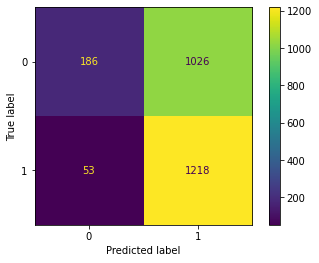

In [ ]:
print("Confusion Matrix is:")
cm = confusion_matrix(true_flagged, pred_revreview)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

In [ ]:
calculate_metrics(true_flagged, pred_revreview)

Accuracy: 0.565
Precision: 0.543
Recall: 0.958
F1 Score: 0.693


In [22]:
def friendCount_check(row, threshold):
  #print(row['friendCount'])
  if row['friendCount']<=threshold:
    return 1
  else:
    return 0

In [23]:
#testing of the rating_check(row):
pred_frnd = []
for index, row in test_df.iterrows():
  pred_frnd.append(friendCount_check(row, 27))

# find accuracy 
calculate_metrics(true_flagged, pred_frnd)

Accuracy: 0.648
Precision: 0.595
Recall: 0.983
F1 Score: 0.741


In [24]:
# Rule for reviewCount feature 
#If threshold <30 - prediction: 1 (fake)
#If threshold >30, prediction: 0 (genuine)

def reviewCount_check(row, threshold):
  if row['reviewCount'] <= threshold:
    return 1
  else:
    return 0

In [25]:
#testing of the rating_check(row):
pred_rccheck = []
for index, row in test_df.iterrows():
  pred_rccheck.append(reviewCount_check(row, 30))

# find accuracy 
calculate_metrics(true_flagged, pred_rccheck)

Accuracy: 0.772
Precision: 0.699
Recall: 0.972
F1 Score: 0.813


## Machine learning


In [26]:
#Train data
train_df = pd.read_csv("new_data_train.csv", sep='\t', index_col=0)
#Validation data
test_df = pd.read_csv("new_data_test.csv", sep='\t', index_col=0)

Data Processing

In [27]:
test_df.drop(['reviewID', 'restaurantID', 'reviewerID', 'date', 'reviewContent', 'name', 'location', 'yelpJoinDate'], axis = 1, inplace = True)
train_df.drop(['reviewID', 'restaurantID', 'reviewerID', 'date', 'reviewContent', 'name', 'location', 'yelpJoinDate'], axis = 1, inplace = True)

In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2483 entries, 7267 to 17022
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             2483 non-null   int64  
 1   reviewUsefulCount  2483 non-null   int64  
 2   flagged            2483 non-null   int64  
 3   friendCount        2483 non-null   int64  
 4   reviewCount        2483 non-null   int64  
 5   firstCount         2483 non-null   int64  
 6   usefulCount        2483 non-null   int64  
 7   coolCount          2483 non-null   int64  
 8   funnyCount         2483 non-null   int64  
 9   complimentCount    2483 non-null   int64  
 10  tipCount           2483 non-null   int64  
 11  fanCount           2483 non-null   int64  
 12  restaurantRating   2483 non-null   float64
 13  ReviewLength       2483 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 291.0 KB


In [29]:
X_1 = test_df.drop(['flagged'],axis = 1)
X_1.head()

,rating,reviewUsefulCount,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength
7267,4,0,0,1,0,0,0,0,0,0,0,4.0,72
731,4,0,0,1,0,0,0,0,0,5,0,4.0,12
9902,3,0,295,845,143,2499,1451,1151,1377,2,55,3.5,102
25894,3,0,1,2,0,0,0,0,0,0,0,4.0,30
17519,4,0,0,1,0,0,0,0,0,0,0,4.0,93


In [30]:
X_1.shape

(2483, 13)

In [31]:
features_names = list(X_1.columns)
features_names

['rating',
 'reviewUsefulCount',
 'friendCount',
 'reviewCount',
 'firstCount',
 'usefulCount',
 'coolCount',
 'funnyCount',
 'complimentCount',
 'tipCount',
 'fanCount',
 'restaurantRating',
 'ReviewLength']

In [32]:
features_names

['rating',
 'reviewUsefulCount',
 'friendCount',
 'reviewCount',
 'firstCount',
 'usefulCount',
 'coolCount',
 'funnyCount',
 'complimentCount',
 'tipCount',
 'fanCount',
 'restaurantRating',
 'ReviewLength']

In [33]:
test_df.head()

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength
7267,4,0,1,0,1,0,0,0,0,0,0,0,4.0,72
731,4,0,0,0,1,0,0,0,0,0,5,0,4.0,12
9902,3,0,0,295,845,143,2499,1451,1151,1377,2,55,3.5,102
25894,3,0,1,1,2,0,0,0,0,0,0,0,4.0,30
17519,4,0,1,0,1,0,0,0,0,0,0,0,4.0,93


In [34]:
print(test_df.shape, train_df.shape)

(2483, 14) (9929, 14)


In [35]:
from sklearn.preprocessing import StandardScaler
def standardize(X):
  scaler = StandardScaler()
  scaler.fit(X)
  X = standardized_data = scaler.transform(X)
  return X

In [36]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [37]:
y_test = test_df.flagged
y_train = train_df.flagged

In [38]:
y_test

7267     1
731      0
9902     0
25894    1
17519    1
        ..
13196    1
10278    1
11476    1
24962    0
17022    0
Name: flagged, Length: 2483, dtype: int64

In [39]:
y_train.value_counts()

0    4994
1    4935
Name: flagged, dtype: int64

In [40]:
X_train = standardize(train_df .drop('flagged', axis=1))
X_test = standardize(test_df .drop('flagged', axis=1))

In [41]:
X_train

array([[ 0.88894467, -0.29259969, -0.19483983, ..., -0.15501767,
         0.23999775,  0.98688562],
       [ 0.88894467, -0.29259969, -0.16390195, ..., -0.15501767,
         0.23999775, -0.4203053 ],
       [ 0.88894467, -0.29259969, -0.19483983, ..., -0.15501767,
        -1.9684709 , -0.82235985],
       ...,
       [ 0.88894467, -0.29259969, -0.19483983, ..., -0.15501767,
         0.23999775, -0.85107803],
       [ 0.08589384, -0.29259969, -0.18865226, ..., -0.15501767,
         0.23999775,  0.71406289],
       [-0.71715698, -0.29259969, -0.13296406, ..., -0.15501767,
         0.23999775, -0.69312803]])

In [42]:
y_train

6010     1
6566     0
21349    1
10370    0
6011     1
        ..
2072     0
20930    1
2420     1
3090     1
22414    0
Name: flagged, Length: 9929, dtype: int64

In [43]:
X_test.shape

(2483, 13)

In [44]:
print(len(X_train), len(y_train) )
print(len(X_test), len(y_test))

9929 9929
2483 2483


SVM - Linear

In [45]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
calculate_metrics(y_test, y_pred)

Accuracy: 0.860
Precision: 0.821
Recall: 0.929
F1 Score: 0.872


SVM - RBF

In [47]:
#https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred_svmrbf = svclassifier.predict(X_test)
calculate_metrics(y_test, y_pred_svmrbf)

Accuracy: 0.849
Precision: 0.791
Recall: 0.957
F1 Score: 0.866


Accuracy: 0.860
Precision: 0.821
Recall: 0.929
F1 Score: 0.872


Text(0.5, 0, 'Importance')

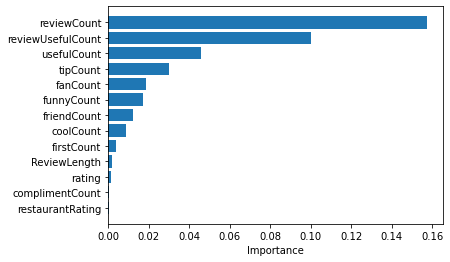

In [48]:
#https://scikit-learn.org/stable/modules/permutation_importance.html
#https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn

# find features
features = np.array(features_names)
# using the classifier
svclassifier =  SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred_svmlin = svclassifier.predict(X_test)
calculate_metrics(y_test, y_pred_svmlin)

# finding the importance
perm_importance = permutation_importance(svclassifier, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Importance")

Logistic regression

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf_lr = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_lr  = clf_lr.predict(X_test)


In [ ]:
calculate_metrics(y_test, y_pred_lr)

Accuracy: 0.856
Precision: 0.805
Recall: 0.949
F1 Score: 0.871


Decision Tree

In [ ]:
#https://scikit-learn.org/stable/modules/tree.html
dt = DecisionTreeClassifier(random_state = 1)
clf = dt.fit(X_train, y_train)

#predictions on test data
preds_test= dt.predict(X_test)
calculate_metrics(y_test, preds_test)

Accuracy: 0.676
Precision: 0.833
Recall: 0.459
F1 Score: 0.592


In [ ]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_5 <= -0.17
|   |--- feature_1 <= 0.00
|   |   |--- feature_2 <= -0.19
|   |   |   |--- feature_3 <= -0.33
|   |   |   |   |--- feature_9 <= -0.13
|   |   |   |   |   |--- feature_3 <= -0.35
|   |   |   |   |   |   |--- feature_2 <= -0.19
|   |   |   |   |   |   |   |--- feature_0 <= -1.92
|   |   |   |   |   |   |   |   |--- feature_11 <= 1.34
|   |   |   |   |   |   |   |   |   |--- feature_11 <= -0.86
|   |   |   |   |   |   |   |   |   |   |--- feature_5 <= -0.18
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- feature_5 >  -0.18
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_11 >  -0.86
|   |   |   |   |   |   |   |   |   |   |--- feature_12 <= -0.27
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- feature_12 >  -0.27
|   |   |   |   |   |   |   |   |   |   |   |--- 

In [ ]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

In [ ]:
#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

dt2 = RandomizedSearchCV(DecisionTreeClassifier(),
                         hyperparam_combs,
                         scoring='f1',
                         random_state=1,
                         n_iter=30,n_jobs=-1)

search = dt2.fit(X_train, y_train)

search.best_params_

{'min_samples_split': 20,
 'max_leaf_nodes': 32,
 'max_features': 0.6,
 'max_depth': 12,
 'criterion': 'gini',
 'class_weight': {0: 1, 1: 1}}

In [ ]:
optimal_params = search.best_params_
optimal_params

{'min_samples_split': 20,
 'max_leaf_nodes': 32,
 'max_features': 0.6,
 'max_depth': 12,
 'criterion': 'gini',
 'class_weight': {0: 1, 1: 1}}

In [ ]:
dt2 = DecisionTreeClassifier(random_state = 1, **optimal_params)
_ = dt2.fit(X_train, y_train)


#predictions on test data
preds_test= dt2.predict(X_test)
calculate_metrics(y_test, preds_test)

Accuracy: 0.692
Precision: 0.816
Recall: 0.513
F1 Score: 0.630


Random forest

In [ ]:

#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
clf_rf=RandomForestClassifier(random_state=1) #by default no of estimators=10
clf_rf.fit(X_train,y_train)

y_pred_rf=clf_rf.predict(X_test)
calculate_metrics(y_test, y_pred_rf)

Accuracy: 0.524
Precision: 0.932
Recall: 0.076
F1 Score: 0.140


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

rf2 = RandomizedSearchCV(RandomForestClassifier(),
                         hyperparam_combs,
                         scoring='f1',
                         random_state=1,
                         n_iter=5,n_jobs=-1)

search = rf2.fit(X_train, y_train)

search.best_params_

{'min_samples_split': 2,
 'max_leaf_nodes': 16,
 'max_features': 0.4,
 'max_depth': 8,
 'criterion': 'entropy',
 'class_weight': {0: 1, 1: 1}}

In [ ]:
optimal_params = search.best_params_
optimal_params
rf2 = RandomForestClassifier(random_state = 1, **optimal_params)
_ = rf2.fit(X_train, y_train)

#predictions on test data
preds_test= rf2.predict(X_test)




Feature: 0, Score: 0.00012
Feature: 1, Score: 0.12709
Feature: 2, Score: 0.22370
Feature: 3, Score: 0.12460
Feature: 4, Score: 0.00299
Feature: 5, Score: 0.30245
Feature: 6, Score: 0.11179
Feature: 7, Score: 0.05523
Feature: 8, Score: 0.03849
Feature: 9, Score: 0.01102
Feature: 10, Score: 0.00040
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00213


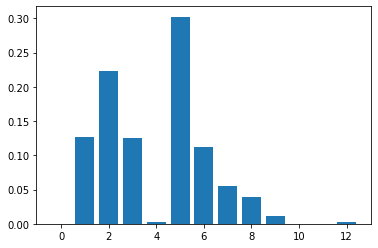

In [ ]:
importance = rf2.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
calculate_metrics(y_test, preds_test)

Accuracy: 0.648
Precision: 0.893
Recall: 0.356
F1 Score: 0.509


Gradient Boost

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf_gb.fit(X_train, y_train)
y_pred_gb=clf_gb.predict(X_test)

In [ ]:
calculate_metrics(y_test, y_pred_gb)

Accuracy: 0.577
Precision: 0.962
Recall: 0.181
F1 Score: 0.305


Stacking


In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_train, y_train)
y_preed_stack = clf.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
calculate_metrics(y_test, y_preed_stack)

Accuracy: 0.689
Precision: 0.899
Recall: 0.442
F1 Score: 0.593


NuSVC

In [49]:
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html
clf_nusvc = make_pipeline(StandardScaler(), NuSVC())
clf_nusvc.fit(X_train, y_train)
y_pred_nusvc = clf_nusvc.predict(X_test)

In [50]:
calculate_metrics(y_test, y_pred_nusvc)

Accuracy: 0.820
Precision: 0.747
Recall: 0.980
F1 Score: 0.848


XGBClassifier

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
# define model
xgb = xgb.XGBClassifier()
xgb = xgb.fit(X_train, y_train)
#predictions on test data
preds_test= xgb.predict(X_test)
calculate_metrics(y_test, preds_test)

Accuracy: 0.618
Precision: 0.938
Recall: 0.271
F1 Score: 0.421


In [ ]:
#Hyper-parameter Tuning on XGBoost

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

xgbc = xgb.XGBClassifier(seed = 20)

clf = RandomizedSearchCV(estimator=xgbc,
                         param_distributions=params,
                         scoring='f1',
                         n_iter=10,
                         verbose=1)


clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBClassifier(seed=20),
                   param_distributions={'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 6, 10, 15, 20],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='f1', verbose=1)

In [ ]:
#Hyper-parameter Tuning on XGBoost

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

xgbc = xgb.XGBClassifier(seed = 20)

clf = RandomizedSearchCV(estimator=xgbc,
                         param_distributions=params,
                         scoring='recall',
                         n_iter=10,
                         verbose=1)


clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBClassifier(seed=20),
                   param_distributions={'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 6, 10, 15, 20],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='recall', verbose=1)

In [ ]:
print("Best parameters:", clf.best_params_)
print("Highest Recall: ", (clf.best_score_))

Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 100, 'max_depth': 20, 'learning_rate': 0.01, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.7}
Highest Recall:  0.9240121580547113


In [ ]:
# define best model
xgb_tuned = xgb.XGBClassifier(subsample= 0.8, n_estimators= 100, max_depth= 20, learning_rate= 0.01, colsample_bytree= 0.7, colsample_bylevel= 0.7)
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bylevel=0.7, colsample_bytree=0.7, learning_rate=0.01,
              max_depth=20, subsample=0.8)

In [ ]:
#predictions on test data
preds_test= xgb_tuned.predict(X_test)

In [ ]:
calculate_metrics(y_test, preds_test)

Accuracy: 0.603
Precision: 0.906
Recall: 0.251
F1 Score: 0.393


## Combining Rule Based

1. usefulCount
4. reviewCount
3. friendCount
4. repeated reviewers


In [ ]:
true_flagged = list(test_df['flagged'])

In [ ]:
true_flagged[-5:]

[1, 1, 1, 0, 0]

In [ ]:
test_df

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,...,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength
7267,dLS_UUea0Yh7et2YlGpUOw,hfQu0YNy_XW5oiiripgUFg,8d_DiHWB-pjBVW3a7D8EWg,1/25/2012,4,0,sunda amazing i heard many good things finally...,1,Mallory M.,"Chicago, IL",...,1,0,0,0,0,0,0,0,4.0,72
731,EDejgdY32F8Lr4ewh7FeiA,_jsZl-USMgrVVasNg50wAQ,boE4Ahsssqic7o5wQLI04w,5/5/2012,4,0,absolutely fantastic foodie community table gr...,0,Shawn K.,"Davenport, FL",...,1,0,0,0,0,0,5,0,4.0,12
9902,TRLtyGBT7VFODhxgyZ2tLA,sZxXpvmBUN2fSCtK_BZFoQ,ms5ge1XY9-Alu7HkybAMdQ,11/9/2007,3,0,i work right rarely go here they 5 personal st...,0,Dane K.,"Chicago, IL",...,845,143,2499,1451,1151,1377,2,55,3.5,102
25894,6QYZT3mkrmBmYNDUN18ILg,YMS9Fzy0OcOXFcS_qms_pg,3Mx2PM7v8qjqhgF3cDXxbQ,6/20/2011,3,0,this best big 3 brazilian steakhouses chicago ...,1,Pennywise S.,"Chicago, IL",...,2,0,0,0,0,0,0,0,4.0,30
17519,xuKTaBhJT0GaI4wRFZi6Qw,uvWWKett-BIRbvyLZXaloQ,vvhfPV-Llkd4fE2SHuLVvA,9/28/2009,4,0,i lunch the gage group 8 this first time there...,1,Rich C.,"Stoneham, MA",...,1,0,0,0,0,0,0,0,4.0,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13196,pFOs_Twh2KSxFpWh3ihaCg,t7NKOWjycGalbiIPDU2KYQ,n-mj6IJkWyCu4BuD2dvm0A,4/28/2011,5,0,there better steak chicago opinion the lobster...,1,jason s.,"Chicago, IL",...,3,0,0,0,2,0,0,0,4.0,16
10278,jXrhZUMxMDWpf9g1Yi-pDw,lbAPRUm_EfCd8pf4w8YFDw,ms5ge1XY9-Alu7HkybAMdQ,8/13/2011,4,0,it controversial topic i believe giordano s be...,1,Chris T.,"Chicago, IL",...,11,0,0,0,0,0,0,0,3.5,35
11476,zqOFLqaQxqUMt3JLEru2sQ,-R_GjIauOKiJZHyN9dDYNQ,d6UbRb9W5eA1yL-DuVZ8ug,6/13/2008,1,0,this place outrageous i went drinks girls thur...,1,Theresa H.,"Chicago, IL",...,1,0,1,0,0,0,0,0,4.0,97
24962,gLZDeE,4xHg83V-f1Q3GSaSkXMEBA,UQ3cGi3GdBljE3i2_qLcBQ,4/28/2011,4,0,ha i ve eating lunch least twice week two year...,0,Liz O.,"Chicago, IL",...,27,0,25,4,4,0,0,1,4.0,49


In [ ]:
len(true_flagged)

2483

In [ ]:
len(test_df)

2483

In [ ]:
#If a review is fake, it is less likely to have a review useful count.  
def usefulCount_check(row, threshold=3):
    if row['usefulCount'] <=threshold:
      return 1
    else:
      return 0

In [ ]:
# Rule for reviewCount feature 
#If threshold <30 - prediction: 1 (fake)
#If threshold >30, prediction: 0 (genuine)

def reviewCount_check(row, threshold=30):
  if row['reviewCount'] <= threshold:
    return 1
  else:
    return 0

In [ ]:
def friendCount_check(row, threshold=27):
  #print(row['friendCount'])
  if row['friendCount']<=threshold:
    return 1
  else:
    return 0

In [ ]:
# number of reviews made by the particular reviewers: if the number of reviews are very less: it is likely a fake review
def number_of_review_check(rev_id, df, threshold=2):

  unique_reviw_id = df.groupby(["reviewerID"])["reviewID"].count().reset_index(name="count").sort_values(by="count",ascending=False)
  if(unique_reviw_id[unique_reviw_id['reviewerID']==rev_id]['count'].values[0]<threshold):
    return 1
  else:
    return 0


In [ ]:
#testing of the rating_check(row):
pred_revreview = []
for index, row in test_df.iterrows():
  rev_id = row['reviewerID']
  pred_revreview.append(number_of_review_check(rev_id, test_df, 3)) #threshold =3
  
# find accuracy 
accuracy_score(true_flagged, pred_revreview)

0.5291985501409585

In [ ]:
# find accuracy (threshold=2)
calculate_metrics(true_flagged, pred_revreview)

Accuracy: 0.529
Precision: 0.521
Recall: 0.998
F1 Score: 0.684


In [ ]:
#testing of the rating_check(row):
pred_revreview = []
for index, row in test_df.iterrows():
  rev_id = row['reviewerID']
  pred_revreview.append(number_of_review_check(rev_id, test_df)) #threshold =2 (default)
  
# find accuracy 
accuracy_score(true_flagged, pred_revreview)

0.5654450261780105

In [ ]:
# find accuracy (threshold=3)
calculate_metrics(true_flagged, pred_revreview)

Accuracy: 0.565
Precision: 0.543
Recall: 0.958
F1 Score: 0.693


###1. Aggregation with 3 Rules Only

In [ ]:
predictions = []

def rule_based_aggregated(df_test):

  #print(df_test.shape)

  for index, row in df_test.iterrows():
    l = []
    l.append(usefulCount_check(row))
    l.append(reviewCount_check(row))
    l.append(friendCount_check(row))

    predictions.append(l)

  #return predictions
  preds_rules_combined = []

  for i in predictions:
    #print(i)
    #print(sum(i))

    if(sum(i)>=2):
      #print("fake")
      preds_rules_combined.append(1)
    
    else:
      #print("genuine")
      preds_rules_combined.append(0)

  return preds_rules_combined


    

In [ ]:
preds_check = rule_based_aggregated(test_df)
#preds_check

In [ ]:
#true_flagged

In [ ]:
len(preds_check), len(true_flagged)

(2483, 2483)

In [ ]:
# find accuracy 
calculate_metrics(true_flagged, preds_check)

Accuracy: 0.782
Precision: 0.710
Recall: 0.969
F1 Score: 0.820


###2. Aggregation with 4 Rules 

In [ ]:
predictions = []

def rule_based_aggregated2(df_test):

  #print(df_test.shape)

  for index, row in df_test.iterrows():
    l = []
    
    #Rules 1 to 3
    l.append(usefulCount_check(row))
    l.append(reviewCount_check(row))
    l.append(friendCount_check(row))

    #Rule 4
    rev_id = row['reviewerID']
    l.append(number_of_review_check(rev_id, df_test)) 

    predictions.append(l)


  #return predictions

  print(predictions)
  preds_rules_combined = []

  for i in predictions:
    #print(i)
    #print(sum(i))

    if(sum(i)>=2):
      #print("fake")
      preds_rules_combined.append(1)
    
    else:
      #print("genuine")
      preds_rules_combined.append(0)

  return preds_rules_combined


    

In [ ]:
preds_check = rule_based_aggregated2(test_df)
#preds_check

[[1, 1, 1, 1], [1, 1, 1, 1], [0, 0, 0, 0], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 0, 1, 0], [0, 0, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1], [0, 0, 0, 1], [0, 0, 0, 1], [1, 1, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 1, 1, 0], [0, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 0, 0, 1], [1, 1, 1, 1], [0, 0, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 0, 0, 1], [0, 1, 1, 0], [0, 0, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 0, 0], [1, 1, 1, 1], [0, 0, 1, 1], [0, 0, 1, 1], [1, 1, 1, 1], [0, 1, 1, 1], [0, 0, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1], [0, 0, 0, 1], [1, 1, 1, 1], [0, 1, 1, 1], [0, 0, 0, 1], [0, 1, 1, 1], [0, 1, 1, 1], [0, 1

In [ ]:
len(preds_check), len(true_flagged)

(2483, 2483)

In [ ]:
# find accuracy 
calculate_metrics(true_flagged, preds_check)

Accuracy: 0.661
Precision: 0.603
Recall: 0.992
F1 Score: 0.750


In [ ]:
predictions = []

def rule_based_aggregated3(df_test):

  #print(df_test.shape)

  for index, row in df_test.iterrows():
    l = []
    
    #Rules 1 to 3
    l.append(usefulCount_check(row))
    l.append(reviewCount_check(row))
    l.append(friendCount_check(row))

    #Rule 4
    rev_id = row['reviewerID']
    l.append(number_of_review_check(rev_id, df_test)) 

    predictions.append(l)


  #return predictions

  print(predictions)
  preds_rules_combined = []

  for i in predictions:
    #print(i)
    #print(sum(i))

    if(sum(i)>=3):
      #print("fake")
      preds_rules_combined.append(1)
    
    else:
      #print("genuine")
      preds_rules_combined.append(0)

  return preds_rules_combined


    

In [ ]:
preds_check = rule_based_aggregated3(test_df)
len(preds_check), len(true_flagged)

[[1, 1, 1, 1], [1, 1, 1, 1], [0, 0, 0, 0], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 0, 1, 0], [0, 0, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1], [0, 0, 0, 1], [0, 0, 0, 1], [1, 1, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 1, 1, 0], [0, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 0, 0, 1], [1, 1, 1, 1], [0, 0, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 0, 0, 1], [0, 1, 1, 0], [0, 0, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 0, 0], [1, 1, 1, 1], [0, 0, 1, 1], [0, 0, 1, 1], [1, 1, 1, 1], [0, 1, 1, 1], [0, 0, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1], [0, 0, 0, 1], [1, 1, 1, 1], [0, 1, 1, 1], [0, 0, 0, 1], [0, 1, 1, 1], [0, 1, 1, 1], [0, 1

(2483, 2483)

In [ ]:
# find accuracy 
calculate_metrics(true_flagged, preds_check)

Accuracy: 0.778
Precision: 0.713
Recall: 0.950
F1 Score: 0.815


###3. Aggregation of 3 Rules with Best ML Model (on Tabular Data)

In [ ]:
train_df_original = train_df.copy()
test_df_original = test_df.copy()
train_df_original.shape, test_df_original.shape

((9929, 22), (2483, 22))

In [ ]:
train_df.shape, test_df.shape

((9929, 22), (2483, 22))

In [ ]:
from sklearn.preprocessing import StandardScaler

test_df.drop(['reviewID', 'restaurantID', 'reviewerID', 'date', 'reviewContent', 'name', 'location', 'yelpJoinDate'], axis = 1, inplace = True)
train_df.drop(['reviewID', 'restaurantID', 'reviewerID', 'date', 'reviewContent', 'name', 'location', 'yelpJoinDate'], axis = 1, inplace = True)



In [ ]:
test_df

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength
7267,4,0,1,0,1,0,0,0,0,0,0,0,4.0,72
731,4,0,0,0,1,0,0,0,0,0,5,0,4.0,12
9902,3,0,0,295,845,143,2499,1451,1151,1377,2,55,3.5,102
25894,3,0,1,1,2,0,0,0,0,0,0,0,4.0,30
17519,4,0,1,0,1,0,0,0,0,0,0,0,4.0,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13196,5,0,1,0,3,0,0,0,2,0,0,0,4.0,16
10278,4,0,1,4,11,0,0,0,0,0,0,0,3.5,35
11476,1,0,1,0,1,0,1,0,0,0,0,0,4.0,97
24962,4,0,0,5,27,0,25,4,4,0,0,1,4.0,49


In [ ]:
X_1 = test_df.drop(['flagged'],axis = 1)

features_names = list(X_1.columns)


def standardize(X):
  scaler = StandardScaler()
  scaler.fit(X)
  X = standardized_data = scaler.transform(X)
  return X

y_test = test_df.flagged
y_train = train_df.flagged

X_train = standardize(train_df .drop('flagged', axis=1))
X_test = standardize(test_df .drop('flagged', axis=1))

print(len(X_train), len(X_test) )
print(len(y_train), len(y_test))

# SVM Linear Model
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

#predictions from ml model
y_pred = svclassifier.predict(X_test)

calculate_metrics(y_test, y_pred)

9929 2483
9929 2483
Accuracy: 0.860
Precision: 0.821
Recall: 0.929
F1 Score: 0.872


In [ ]:
y_test

7267     1
731      0
9902     0
25894    1
17519    1
        ..
13196    1
10278    1
11476    1
24962    0
17022    0
Name: flagged, Length: 2483, dtype: int64

In [ ]:
y_pred

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
predictions = []

def rule_based_aggregated_with_best_ml(df_test, ml_model_preds):

  
  print(df_test.shape)
  print(len(ml_model_preds))


  i=0
  for index, row in df_test.iterrows():

   
    
    l = []
    
    #Rules 1 to 3
    l.append(usefulCount_check(row))
    l.append(reviewCount_check(row))
    l.append(friendCount_check(row))

    #ML model prediction
    #print(ml_model_preds[i])
    l.append(ml_model_preds[i])


    predictions.append(l)
    
    i=i+1


  #return predictions

  print(predictions)
  preds_rules_combined = []

  for i in predictions:
    #print(i)
    #print(sum(i))

    if(sum(i)>=4): #majority voting threshold
      #print("fake")
      preds_rules_combined.append(1)
    
    else:
      #print("genuine")
      preds_rules_combined.append(0)

  return preds_rules_combined


    

In [ ]:
preds_check = rule_based_aggregated_with_best_ml(test_df,  ml_model_preds= y_pred)
len(preds_check), len(true_flagged)

(2483, 14)
2483
[[1, 1, 1, 1], [1, 1, 1, 1], [0, 0, 0, 0], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 0, 1, 0], [0, 0, 1, 0], [0, 1, 1, 1], [1, 1, 1, 1], [0, 1, 1, 0], [1, 1, 1, 1], [0, 1, 1, 0], [0, 1, 1, 1], [0, 1, 1, 0], [0, 1, 1, 1], [1, 1, 1, 1], [0, 0, 0, 0], [0, 0, 0, 0], [1, 1, 1, 1], [0, 1, 1, 0], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 1, 1, 0], [0, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 0, 0, 0], [1, 1, 1, 1], [0, 0, 1, 0], [0, 1, 1, 0], [1, 1, 1, 1], [1, 1, 1, 1], [0, 0, 0, 0], [0, 1, 1, 1], [0, 0, 0, 0], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 0], [0, 1, 1, 1], [0, 0, 1, 0], [0, 0, 0, 0], [1, 1, 1, 1], [0, 0, 1, 0], [0, 0, 1, 0], [1, 1, 1, 1], [0, 1, 1, 1], [0, 0, 1, 0], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 1, 1, 0], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 1, 1, 0], [0, 1, 1, 0], [1, 1, 1, 1], [0, 0, 0, 0], [1, 1, 1, 1], [0, 1, 1, 0], [0, 0, 0, 0], [0, 1, 1, 0], [0,

(2483, 2483)

In [ ]:
# find accuracy (majority threshold=2)
calculate_metrics(true_flagged, preds_check)

Accuracy: 0.782
Precision: 0.709
Recall: 0.972
F1 Score: 0.820


In [ ]:
# find accuracy (majority threshold=3)
calculate_metrics(true_flagged, preds_check)

Accuracy: 0.849
Precision: 0.805
Recall: 0.931
F1 Score: 0.864


In [ ]:
# find accuracy (majority threshold=4)
calculate_metrics(true_flagged, preds_check)

Accuracy: 0.828
Precision: 0.878
Recall: 0.770
F1 Score: 0.821


###4. Aggregation with Weighing Scheme

In [ ]:
predictions = []

def aggregation_with_weighing(df_test, ml_model_preds):

  
  print(df_test.shape)
  print(len(ml_model_preds))


  i=0
  for index, row in df_test.iterrows():

   
    
    l = []
    
    #Rules 1 to 3
    l.append(usefulCount_check(row)*2) #give a weight of 2
    l.append(reviewCount_check(row)*1)
    l.append(friendCount_check(row)*2)

    #ML model prediction
    #print(ml_model_preds[i])
    l.append(ml_model_preds[i]*3)


    predictions.append(l)
    
    i=i+1


  #return predictions

  print(predictions)
  preds_rules_combined = []

  for i in predictions:
    #print(i)
    #print(sum(i))

    if(sum(i)>=6): #majority voting threshold
      #print("fake")
      preds_rules_combined.append(1)
    
    else:
      #print("genuine")
      preds_rules_combined.append(0)

  return preds_rules_combined


    

In [ ]:
preds_check = aggregation_with_weighing(test_df,  ml_model_preds= y_pred)
len(preds_check), len(true_flagged)

(2483, 14)
2483
[[2, 1, 2, 3], [2, 1, 2, 3], [0, 0, 0, 0], [2, 1, 2, 3], [2, 1, 2, 3], [2, 1, 2, 3], [0, 0, 2, 0], [0, 0, 2, 0], [0, 1, 2, 3], [2, 1, 2, 3], [0, 1, 2, 0], [2, 1, 2, 3], [0, 1, 2, 0], [0, 1, 2, 3], [0, 1, 2, 0], [0, 1, 2, 3], [2, 1, 2, 3], [0, 0, 0, 0], [0, 0, 0, 0], [2, 1, 2, 3], [0, 1, 2, 0], [2, 1, 2, 3], [2, 1, 2, 3], [2, 1, 2, 3], [0, 1, 2, 0], [0, 1, 2, 3], [2, 1, 2, 3], [2, 1, 2, 3], [2, 1, 2, 3], [0, 0, 0, 0], [2, 1, 2, 3], [0, 0, 2, 0], [0, 1, 2, 0], [2, 1, 2, 3], [2, 1, 2, 3], [0, 0, 0, 0], [0, 1, 2, 3], [0, 0, 0, 0], [2, 1, 2, 3], [2, 1, 2, 3], [2, 1, 2, 3], [2, 1, 2, 3], [0, 1, 2, 3], [2, 1, 2, 3], [2, 1, 2, 3], [2, 1, 2, 0], [0, 1, 2, 3], [0, 0, 2, 0], [0, 0, 0, 0], [2, 1, 2, 3], [0, 0, 2, 0], [0, 0, 2, 0], [2, 1, 2, 3], [0, 1, 2, 3], [0, 0, 2, 0], [2, 1, 2, 3], [2, 1, 2, 3], [2, 1, 2, 3], [0, 1, 2, 0], [2, 1, 2, 3], [2, 1, 2, 3], [2, 1, 2, 3], [0, 1, 2, 0], [0, 1, 2, 0], [2, 1, 2, 3], [0, 0, 0, 0], [2, 1, 2, 3], [0, 1, 2, 0], [0, 0, 0, 0], [0, 1, 2, 0], [0,

(2483, 2483)

In [ ]:
# find accuracy (majority threshold=2)
calculate_metrics(true_flagged, preds_check)

Accuracy: 0.860
Precision: 0.823
Recall: 0.926
F1 Score: 0.872


###5. Custom Flow Chart based Aggregation

In [ ]:
#If reviewCount is less than equal to 30, report fake
#From the remaining rows, if friendCount is less than equal to 27, report fake

#From the remaining rows, If usefulCount is less than equal to 3, report fake

#From the remaining rows, apply SVM tabular/ Text data ML Model

In [ ]:
test_df

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength
7267,4,0,1,0,1,0,0,0,0,0,0,0,4.0,72
731,4,0,0,0,1,0,0,0,0,0,5,0,4.0,12
9902,3,0,0,295,845,143,2499,1451,1151,1377,2,55,3.5,102
25894,3,0,1,1,2,0,0,0,0,0,0,0,4.0,30
17519,4,0,1,0,1,0,0,0,0,0,0,0,4.0,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13196,5,0,1,0,3,0,0,0,2,0,0,0,4.0,16
10278,4,0,1,4,11,0,0,0,0,0,0,0,3.5,35
11476,1,0,1,0,1,0,1,0,0,0,0,0,4.0,97
24962,4,0,0,5,27,0,25,4,4,0,0,1,4.0,49


In [ ]:
def rule1_pred(row):
    if row['reviewCount'] <= 30:
        val = 1
    else:
        val = -1
    return val

test_df['Pred'] = test_df.apply(rule1_pred, axis=1)
test_df

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,Pred
7267,4,0,1,0,1,0,0,0,0,0,0,0,4.0,72,1
731,4,0,0,0,1,0,0,0,0,0,5,0,4.0,12,1
9902,3,0,0,295,845,143,2499,1451,1151,1377,2,55,3.5,102,-1
25894,3,0,1,1,2,0,0,0,0,0,0,0,4.0,30,1
17519,4,0,1,0,1,0,0,0,0,0,0,0,4.0,93,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13196,5,0,1,0,3,0,0,0,2,0,0,0,4.0,16,1
10278,4,0,1,4,11,0,0,0,0,0,0,0,3.5,35,1
11476,1,0,1,0,1,0,1,0,0,0,0,0,4.0,97,1
24962,4,0,0,5,27,0,25,4,4,0,0,1,4.0,49,1


In [ ]:
test_df['Pred'].value_counts()

 1    1768
-1     715
Name: Pred, dtype: int64

In [ ]:
test_df_results1 = test_df[test_df['Pred']==1]
test_df_results1

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,Pred
7267,4,0,1,0,1,0,0,0,0,0,0,0,4.0,72,1
731,4,0,0,0,1,0,0,0,0,0,5,0,4.0,12,1
25894,3,0,1,1,2,0,0,0,0,0,0,0,4.0,30,1
17519,4,0,1,0,1,0,0,0,0,0,0,0,4.0,93,1
14920,4,0,1,25,3,0,1,0,0,5,0,1,4.0,48,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13196,5,0,1,0,3,0,0,0,2,0,0,0,4.0,16,1
10278,4,0,1,4,11,0,0,0,0,0,0,0,3.5,35,1
11476,1,0,1,0,1,0,1,0,0,0,0,0,4.0,97,1
24962,4,0,0,5,27,0,25,4,4,0,0,1,4.0,49,1


In [ ]:
test_df_results1['Pred'].value_counts()

1    1768
Name: Pred, dtype: int64

In [ ]:
test_df_results2 = test_df[test_df['Pred']==-1]
test_df_results2

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,Pred
9902,3,0,0,295,845,143,2499,1451,1151,1377,2,55,3.5,102,-1
13557,3,0,0,6,42,0,44,12,22,2,45,1,4.0,118,-1
14474,5,0,0,8,201,19,104,34,39,15,2,2,4.0,43,-1
2086,5,1,0,187,756,60,2966,2579,2141,1922,85,38,4.0,186,-1
5098,5,2,0,59,140,34,200,98,39,58,0,6,4.0,198,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19905,4,0,0,5,31,2,39,14,11,5,0,0,4.0,71,-1
7690,4,0,0,22,85,5,93,26,16,8,3,0,3.5,37,-1
16926,5,0,0,19,61,0,22,9,18,4,0,0,4.0,34,-1
23756,2,0,0,0,79,7,61,22,33,3,0,1,4.0,121,-1


In [ ]:
test_df_results2['Pred'].value_counts()

-1    715
Name: Pred, dtype: int64

In [ ]:
def rule2_pred(row):
    if row['friendCount'] <= 27:
        val = 1
    else:
        val = -1
    return val

In [ ]:
test_df_results2.apply(rule2_pred, axis=1)

9902    -1
13557    1
14474    1
2086    -1
5098    -1
        ..
19905    1
7690     1
16926    1
23756    1
8233    -1
Length: 715, dtype: int64

In [ ]:
test_df_results2['Pred'] = test_df_results2.apply(rule2_pred, axis=1)
test_df_results2

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,Pred
9902,3,0,0,295,845,143,2499,1451,1151,1377,2,55,3.5,102,-1
13557,3,0,0,6,42,0,44,12,22,2,45,1,4.0,118,1
14474,5,0,0,8,201,19,104,34,39,15,2,2,4.0,43,1
2086,5,1,0,187,756,60,2966,2579,2141,1922,85,38,4.0,186,-1
5098,5,2,0,59,140,34,200,98,39,58,0,6,4.0,198,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19905,4,0,0,5,31,2,39,14,11,5,0,0,4.0,71,1
7690,4,0,0,22,85,5,93,26,16,8,3,0,3.5,37,1
16926,5,0,0,19,61,0,22,9,18,4,0,0,4.0,34,1
23756,2,0,0,0,79,7,61,22,33,3,0,1,4.0,121,1


In [ ]:
test_df_results2['Pred'].value_counts()

 1    385
-1    330
Name: Pred, dtype: int64

In [ ]:
test_df_results3 = test_df_results2[test_df_results2['Pred']==-1]
test_df_results3

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,Pred
9902,3,0,0,295,845,143,2499,1451,1151,1377,2,55,3.5,102,-1
2086,5,1,0,187,756,60,2966,2579,2141,1922,85,38,4.0,186,-1
5098,5,2,0,59,140,34,200,98,39,58,0,6,4.0,198,-1
17318,4,0,0,47,99,1,235,157,199,167,0,15,4.0,49,-1
6264,1,3,0,99,178,12,435,391,249,344,233,6,4.0,235,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24678,4,3,0,593,43,5,323,241,169,248,0,7,4.0,124,-1
22887,4,0,0,182,247,4,274,137,134,63,210,10,4.0,96,-1
18363,5,3,0,148,263,14,251,135,96,84,46,6,4.0,258,-1
14228,1,2,0,30,33,1,29,10,7,1,3,0,4.0,67,-1


In [ ]:
test_df_results2 = test_df_results2[test_df_results2['Pred']==1]
test_df_results2

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,Pred
13557,3,0,0,6,42,0,44,12,22,2,45,1,4.0,118,1
14474,5,0,0,8,201,19,104,34,39,15,2,2,4.0,43,1
26012,3,0,0,19,71,0,26,5,12,9,3,0,4.0,65,1
17757,4,1,0,24,169,1,170,66,67,19,0,8,4.0,244,1
15464,5,0,0,1,71,2,61,19,21,2,0,1,4.0,62,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,4,0,0,3,64,1,80,19,18,9,0,1,4.5,21,1
19905,4,0,0,5,31,2,39,14,11,5,0,0,4.0,71,1
7690,4,0,0,22,85,5,93,26,16,8,3,0,3.5,37,1
16926,5,0,0,19,61,0,22,9,18,4,0,0,4.0,34,1


In [ ]:
def rule3_pred(row):
    if row['usefulCount'] <=3:
        val = 1
    else:
        val = -1
    return val

In [ ]:
test_df_results3.apply(rule3_pred, axis=1)

9902    -1
2086    -1
5098    -1
17318   -1
6264    -1
        ..
24678   -1
22887   -1
18363   -1
14228   -1
8233    -1
Length: 330, dtype: int64

In [ ]:
test_df_results3['Pred'] = test_df_results3.apply(rule3_pred, axis=1)
test_df_results3

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,Pred
9902,3,0,0,295,845,143,2499,1451,1151,1377,2,55,3.5,102,-1
2086,5,1,0,187,756,60,2966,2579,2141,1922,85,38,4.0,186,-1
5098,5,2,0,59,140,34,200,98,39,58,0,6,4.0,198,-1
17318,4,0,0,47,99,1,235,157,199,167,0,15,4.0,49,-1
6264,1,3,0,99,178,12,435,391,249,344,233,6,4.0,235,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24678,4,3,0,593,43,5,323,241,169,248,0,7,4.0,124,-1
22887,4,0,0,182,247,4,274,137,134,63,210,10,4.0,96,-1
18363,5,3,0,148,263,14,251,135,96,84,46,6,4.0,258,-1
14228,1,2,0,30,33,1,29,10,7,1,3,0,4.0,67,-1


In [ ]:
test_df_results3['Pred'].value_counts()

-1    329
 1      1
Name: Pred, dtype: int64

In [ ]:
test_df_results4 = test_df_results3[test_df_results3['Pred']==-1]
test_df_results4

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,Pred
9902,3,0,0,295,845,143,2499,1451,1151,1377,2,55,3.5,102,-1
2086,5,1,0,187,756,60,2966,2579,2141,1922,85,38,4.0,186,-1
5098,5,2,0,59,140,34,200,98,39,58,0,6,4.0,198,-1
17318,4,0,0,47,99,1,235,157,199,167,0,15,4.0,49,-1
6264,1,3,0,99,178,12,435,391,249,344,233,6,4.0,235,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24678,4,3,0,593,43,5,323,241,169,248,0,7,4.0,124,-1
22887,4,0,0,182,247,4,274,137,134,63,210,10,4.0,96,-1
18363,5,3,0,148,263,14,251,135,96,84,46,6,4.0,258,-1
14228,1,2,0,30,33,1,29,10,7,1,3,0,4.0,67,-1


In [ ]:
test_df_results3 = test_df_results3[test_df_results3['Pred']==1]
test_df_results3

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,Pred
14757,5,0,1,30,44,0,3,2,3,0,0,0,4.0,51,1


In [ ]:
#let' set predictions of these rows as 0
test_df_results4['Pred'] = 0
test_df_results4

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,Pred
9902,3,0,0,295,845,143,2499,1451,1151,1377,2,55,3.5,102,0
2086,5,1,0,187,756,60,2966,2579,2141,1922,85,38,4.0,186,0
5098,5,2,0,59,140,34,200,98,39,58,0,6,4.0,198,0
17318,4,0,0,47,99,1,235,157,199,167,0,15,4.0,49,0
6264,1,3,0,99,178,12,435,391,249,344,233,6,4.0,235,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24678,4,3,0,593,43,5,323,241,169,248,0,7,4.0,124,0
22887,4,0,0,182,247,4,274,137,134,63,210,10,4.0,96,0
18363,5,3,0,148,263,14,251,135,96,84,46,6,4.0,258,0
14228,1,2,0,30,33,1,29,10,7,1,3,0,4.0,67,0


In [ ]:
#final results

In [ ]:
test_df_results1

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,Pred
7267,4,0,1,0,1,0,0,0,0,0,0,0,4.0,72,1
731,4,0,0,0,1,0,0,0,0,0,5,0,4.0,12,1
25894,3,0,1,1,2,0,0,0,0,0,0,0,4.0,30,1
17519,4,0,1,0,1,0,0,0,0,0,0,0,4.0,93,1
14920,4,0,1,25,3,0,1,0,0,5,0,1,4.0,48,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13196,5,0,1,0,3,0,0,0,2,0,0,0,4.0,16,1
10278,4,0,1,4,11,0,0,0,0,0,0,0,3.5,35,1
11476,1,0,1,0,1,0,1,0,0,0,0,0,4.0,97,1
24962,4,0,0,5,27,0,25,4,4,0,0,1,4.0,49,1


In [ ]:
test_df_results2

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,Pred
13557,3,0,0,6,42,0,44,12,22,2,45,1,4.0,118,1
14474,5,0,0,8,201,19,104,34,39,15,2,2,4.0,43,1
26012,3,0,0,19,71,0,26,5,12,9,3,0,4.0,65,1
17757,4,1,0,24,169,1,170,66,67,19,0,8,4.0,244,1
15464,5,0,0,1,71,2,61,19,21,2,0,1,4.0,62,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,4,0,0,3,64,1,80,19,18,9,0,1,4.5,21,1
19905,4,0,0,5,31,2,39,14,11,5,0,0,4.0,71,1
7690,4,0,0,22,85,5,93,26,16,8,3,0,3.5,37,1
16926,5,0,0,19,61,0,22,9,18,4,0,0,4.0,34,1


In [ ]:
test_df_results3

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,Pred
14757,5,0,1,30,44,0,3,2,3,0,0,0,4.0,51,1


In [ ]:
test_df_results4

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,Pred
9902,3,0,0,295,845,143,2499,1451,1151,1377,2,55,3.5,102,0
2086,5,1,0,187,756,60,2966,2579,2141,1922,85,38,4.0,186,0
5098,5,2,0,59,140,34,200,98,39,58,0,6,4.0,198,0
17318,4,0,0,47,99,1,235,157,199,167,0,15,4.0,49,0
6264,1,3,0,99,178,12,435,391,249,344,233,6,4.0,235,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24678,4,3,0,593,43,5,323,241,169,248,0,7,4.0,124,0
22887,4,0,0,182,247,4,274,137,134,63,210,10,4.0,96,0
18363,5,3,0,148,263,14,251,135,96,84,46,6,4.0,258,0
14228,1,2,0,30,33,1,29,10,7,1,3,0,4.0,67,0


In [ ]:
final_results = pd.concat([test_df_results1, test_df_results2, test_df_results3,test_df_results4])
final_results

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,Pred
7267,4,0,1,0,1,0,0,0,0,0,0,0,4.0,72,1
731,4,0,0,0,1,0,0,0,0,0,5,0,4.0,12,1
25894,3,0,1,1,2,0,0,0,0,0,0,0,4.0,30,1
17519,4,0,1,0,1,0,0,0,0,0,0,0,4.0,93,1
14920,4,0,1,25,3,0,1,0,0,5,0,1,4.0,48,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24678,4,3,0,593,43,5,323,241,169,248,0,7,4.0,124,0
22887,4,0,0,182,247,4,274,137,134,63,210,10,4.0,96,0
18363,5,3,0,148,263,14,251,135,96,84,46,6,4.0,258,0
14228,1,2,0,30,33,1,29,10,7,1,3,0,4.0,67,0


In [ ]:
calculate_metrics(final_results['flagged'], final_results['Pred'])

Accuracy: 0.640
Precision: 0.587
Recall: 0.995
F1 Score: 0.739


In [ ]:
#If usefulCount and reviewCount both true together, give it 1 else pass through text model?

In [ ]:
test_df.drop(['Pred'], axis=1, inplace=True)
test_df

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength
7267,4,0,1,0,1,0,0,0,0,0,0,0,4.0,72
731,4,0,0,0,1,0,0,0,0,0,5,0,4.0,12
9902,3,0,0,295,845,143,2499,1451,1151,1377,2,55,3.5,102
25894,3,0,1,1,2,0,0,0,0,0,0,0,4.0,30
17519,4,0,1,0,1,0,0,0,0,0,0,0,4.0,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13196,5,0,1,0,3,0,0,0,2,0,0,0,4.0,16
10278,4,0,1,4,11,0,0,0,0,0,0,0,3.5,35
11476,1,0,1,0,1,0,1,0,0,0,0,0,4.0,97
24962,4,0,0,5,27,0,25,4,4,0,0,1,4.0,49


In [ ]:
def rule_pred(row):

    if row['friendCount'] <= 27 and row['reviewCount'] <= 30:
        val = 1
    else:
        val = -1
    return val


test_df['Pred'] = test_df.apply(rule_pred, axis=1)
test_df

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,Pred
7267,4,0,1,0,1,0,0,0,0,0,0,0,4.0,72,1
731,4,0,0,0,1,0,0,0,0,0,5,0,4.0,12,1
9902,3,0,0,295,845,143,2499,1451,1151,1377,2,55,3.5,102,-1
25894,3,0,1,1,2,0,0,0,0,0,0,0,4.0,30,1
17519,4,0,1,0,1,0,0,0,0,0,0,0,4.0,93,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13196,5,0,1,0,3,0,0,0,2,0,0,0,4.0,16,1
10278,4,0,1,4,11,0,0,0,0,0,0,0,3.5,35,1
11476,1,0,1,0,1,0,1,0,0,0,0,0,4.0,97,1
24962,4,0,0,5,27,0,25,4,4,0,0,1,4.0,49,1


In [ ]:
test_df['Pred'].value_counts()

 1    1717
-1     766
Name: Pred, dtype: int64

In [ ]:
test_df_results1 = test_df[test_df['Pred']==1]
test_df_results1

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,Pred
7267,4,0,1,0,1,0,0,0,0,0,0,0,4.0,72,1
731,4,0,0,0,1,0,0,0,0,0,5,0,4.0,12,1
25894,3,0,1,1,2,0,0,0,0,0,0,0,4.0,30,1
17519,4,0,1,0,1,0,0,0,0,0,0,0,4.0,93,1
14920,4,0,1,25,3,0,1,0,0,5,0,1,4.0,48,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13196,5,0,1,0,3,0,0,0,2,0,0,0,4.0,16,1
10278,4,0,1,4,11,0,0,0,0,0,0,0,3.5,35,1
11476,1,0,1,0,1,0,1,0,0,0,0,0,4.0,97,1
24962,4,0,0,5,27,0,25,4,4,0,0,1,4.0,49,1


In [ ]:
test_df_results1.to_csv("test_df_results1.csv")

In [ ]:
test_df_results1['Pred'].value_counts()

1    1717
Name: Pred, dtype: int64

In [ ]:
test_df_left = test_df[test_df['Pred']==-1]
test_df_left

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,Pred
9902,3,0,0,295,845,143,2499,1451,1151,1377,2,55,3.5,102,-1
13557,3,0,0,6,42,0,44,12,22,2,45,1,4.0,118,-1
14474,5,0,0,8,201,19,104,34,39,15,2,2,4.0,43,-1
2086,5,1,0,187,756,60,2966,2579,2141,1922,85,38,4.0,186,-1
5098,5,2,0,59,140,34,200,98,39,58,0,6,4.0,198,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7690,4,0,0,22,85,5,93,26,16,8,3,0,3.5,37,-1
16926,5,0,0,19,61,0,22,9,18,4,0,0,4.0,34,-1
23756,2,0,0,0,79,7,61,22,33,3,0,1,4.0,121,-1
8233,4,1,0,49,90,9,281,96,104,38,92,1,4.0,432,-1


In [ ]:
test_df_left

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,Pred
9902,3,0,0,295,845,143,2499,1451,1151,1377,2,55,3.5,102,-1
13557,3,0,0,6,42,0,44,12,22,2,45,1,4.0,118,-1
14474,5,0,0,8,201,19,104,34,39,15,2,2,4.0,43,-1
2086,5,1,0,187,756,60,2966,2579,2141,1922,85,38,4.0,186,-1
5098,5,2,0,59,140,34,200,98,39,58,0,6,4.0,198,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7690,4,0,0,22,85,5,93,26,16,8,3,0,3.5,37,-1
16926,5,0,0,19,61,0,22,9,18,4,0,0,4.0,34,-1
23756,2,0,0,0,79,7,61,22,33,3,0,1,4.0,121,-1
8233,4,1,0,49,90,9,281,96,104,38,92,1,4.0,432,-1


In [ ]:
test_df_left.to_csv("test_df_left.csv")

In [ ]:
y_test_left = test_df_left.flagged
y_test_left

9902     0
13557    0
14474    0
2086     0
5098     0
        ..
7690     0
16926    0
23756    0
8233     0
8792     0
Name: flagged, Length: 766, dtype: int64

In [ ]:
X_test_left = standardize(test_df_left .drop(['Pred','flagged'], axis=1))


In [ ]:
len(X_test_left), len(y_test_left)

(766, 766)

In [ ]:
svclassifier

SVC(kernel='linear')

In [ ]:
#predictions from ml model
y_pred_left = svclassifier.predict(X_test_left)

In [ ]:
y_pred_left

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,

In [ ]:
test_df_left

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,Pred
9902,3,0,0,295,845,143,2499,1451,1151,1377,2,55,3.5,102,-1
13557,3,0,0,6,42,0,44,12,22,2,45,1,4.0,118,-1
14474,5,0,0,8,201,19,104,34,39,15,2,2,4.0,43,-1
2086,5,1,0,187,756,60,2966,2579,2141,1922,85,38,4.0,186,-1
5098,5,2,0,59,140,34,200,98,39,58,0,6,4.0,198,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7690,4,0,0,22,85,5,93,26,16,8,3,0,3.5,37,-1
16926,5,0,0,19,61,0,22,9,18,4,0,0,4.0,34,-1
23756,2,0,0,0,79,7,61,22,33,3,0,1,4.0,121,-1
8233,4,1,0,49,90,9,281,96,104,38,92,1,4.0,432,-1


In [ ]:
test_df_left['Pred'] = y_pred_left
test_df_left

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,Pred
9902,3,0,0,295,845,143,2499,1451,1151,1377,2,55,3.5,102,0
13557,3,0,0,6,42,0,44,12,22,2,45,1,4.0,118,1
14474,5,0,0,8,201,19,104,34,39,15,2,2,4.0,43,0
2086,5,1,0,187,756,60,2966,2579,2141,1922,85,38,4.0,186,0
5098,5,2,0,59,140,34,200,98,39,58,0,6,4.0,198,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7690,4,0,0,22,85,5,93,26,16,8,3,0,3.5,37,1
16926,5,0,0,19,61,0,22,9,18,4,0,0,4.0,34,1
23756,2,0,0,0,79,7,61,22,33,3,0,1,4.0,121,1
8233,4,1,0,49,90,9,281,96,104,38,92,1,4.0,432,0


In [ ]:
test_df_left.shape

(766, 15)

In [ ]:
test_df_results1

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,Pred
7267,4,0,1,0,1,0,0,0,0,0,0,0,4.0,72,1
731,4,0,0,0,1,0,0,0,0,0,5,0,4.0,12,1
25894,3,0,1,1,2,0,0,0,0,0,0,0,4.0,30,1
17519,4,0,1,0,1,0,0,0,0,0,0,0,4.0,93,1
14920,4,0,1,25,3,0,1,0,0,5,0,1,4.0,48,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13196,5,0,1,0,3,0,0,0,2,0,0,0,4.0,16,1
10278,4,0,1,4,11,0,0,0,0,0,0,0,3.5,35,1
11476,1,0,1,0,1,0,1,0,0,0,0,0,4.0,97,1
24962,4,0,0,5,27,0,25,4,4,0,0,1,4.0,49,1


In [ ]:
final_results = pd.concat([test_df_results1, test_df_left])
final_results

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,Pred
7267,4,0,1,0,1,0,0,0,0,0,0,0,4.0,72,1
731,4,0,0,0,1,0,0,0,0,0,5,0,4.0,12,1
25894,3,0,1,1,2,0,0,0,0,0,0,0,4.0,30,1
17519,4,0,1,0,1,0,0,0,0,0,0,0,4.0,93,1
14920,4,0,1,25,3,0,1,0,0,5,0,1,4.0,48,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7690,4,0,0,22,85,5,93,26,16,8,3,0,3.5,37,1
16926,5,0,0,19,61,0,22,9,18,4,0,0,4.0,34,1
23756,2,0,0,0,79,7,61,22,33,3,0,1,4.0,121,1
8233,4,1,0,49,90,9,281,96,104,38,92,1,4.0,432,0


In [ ]:
calculate_metrics(final_results['flagged'], final_results['Pred'])

Accuracy: 0.644
Precision: 0.590
Recall: 0.998
F1 Score: 0.742


In [ ]:
test_df_results1

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,Pred
7267,4,0,1,0,1,0,0,0,0,0,0,0,4.0,72,1
731,4,0,0,0,1,0,0,0,0,0,5,0,4.0,12,1
25894,3,0,1,1,2,0,0,0,0,0,0,0,4.0,30,1
17519,4,0,1,0,1,0,0,0,0,0,0,0,4.0,93,1
14920,4,0,1,25,3,0,1,0,0,5,0,1,4.0,48,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13196,5,0,1,0,3,0,0,0,2,0,0,0,4.0,16,1
10278,4,0,1,4,11,0,0,0,0,0,0,0,3.5,35,1
11476,1,0,1,0,1,0,1,0,0,0,0,0,4.0,97,1
24962,4,0,0,5,27,0,25,4,4,0,0,1,4.0,49,1


In [ ]:
test_df_results1 = test_df_results1[['flagged','Pred']]

In [ ]:
test_df_results1

,flagged,Pred
7267,1,1
731,0,1
25894,1,1
17519,1,1
14920,1,1
...,...,...
13196,1,1
10278,1,1
11476,1,1
24962,0,1


In [ ]:
test_df_left_completed = pd.read_csv("test_df_left_completed.csv",index_col=0)
test_df_left_completed

,reviewContent,flagged,Pred
9902,i work right rarely go here they 5 personal st...,0,0
13557,after hype i say i expected more gastropubs fa...,0,0
14474,i hot dog fan i say superdawg super treat it m...,0,0
2086,excellent thin crust pizza brewpub tv screens ...,0,0
5098,you know i hate fake latin food you know i lov...,0,0
...,...,...,...
7690,yummy i hate get flavorless melon fruit choice...,0,1
16926,great selection fresh seafood have 5 times alw...,0,1
23756,put select get hype place the refried beans lo...,0,0
8233,if looking awesome place breakfast look come m...,0,0


In [ ]:
test_df_left_completed = test_df_left_completed[['flagged',"Pred"]]
test_df_left_completed

,flagged,Pred
9902,0,0
13557,0,0
14474,0,0
2086,0,0
5098,0,0
...,...,...
7690,0,1
16926,0,1
23756,0,0
8233,0,0


In [ ]:
final_results2 = pd.concat([test_df_results1, test_df_left_completed])
final_results2

,flagged,Pred
7267,1,1
731,0,1
25894,1,1
17519,1,1
14920,1,1
...,...,...
7690,0,1
16926,0,1
23756,0,0
8233,0,0


In [ ]:
calculate_metrics(final_results2['flagged'], final_results2['Pred'])

Accuracy: 0.718
Precision: 0.647
Recall: 0.990
F1 Score: 0.782


In [ ]:
#X_1 = test_df.drop(['flagged'],axis = 1)

#features_names = list(X_1.columns)


#def standardize(X):
#  scaler = StandardScaler()
#  scaler.fit(X)
#  X = standardized_data = scaler.transform(X)
#  return X

#y_test = test_df.flagged
#y_train = train_df.flagged

#X_train = standardize(train_df .drop('flagged', axis=1))
#X_test = standardize(test_df .drop('flagged', axis=1))

print(len(X_train), len(X_test) )
print(len(y_train), len(y_test))

# SVM Linear Model
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

#predictions from ml model
y_pred = svclassifier.predict(X_test)

calculate_metrics(y_test, y_pred)

9929 2483
9929 2483
Accuracy: 0.860
Precision: 0.821
Recall: 0.929
F1 Score: 0.872


In [ ]:
y_test

7267     1
731      0
9902     0
25894    1
17519    1
        ..
13196    1
10278    1
11476    1
24962    0
17022    0
Name: flagged, Length: 2483, dtype: int64

In [ ]:
y_pred

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
test_df

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength
7267,4,0,1,0,1,0,0,0,0,0,0,0,4.0,72
731,4,0,0,0,1,0,0,0,0,0,5,0,4.0,12
9902,3,0,0,295,845,143,2499,1451,1151,1377,2,55,3.5,102
25894,3,0,1,1,2,0,0,0,0,0,0,0,4.0,30
17519,4,0,1,0,1,0,0,0,0,0,0,0,4.0,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13196,5,0,1,0,3,0,0,0,2,0,0,0,4.0,16
10278,4,0,1,4,11,0,0,0,0,0,0,0,3.5,35
11476,1,0,1,0,1,0,1,0,0,0,0,0,4.0,97
24962,4,0,0,5,27,0,25,4,4,0,0,1,4.0,49


In [ ]:
true_flagged[-5:]

[1, 1, 1, 0, 0]